## **MBA EM INTELIGENCIA ARTIFICIAL E BIGDATA**
## **CURSO 2 - CD, AM E DM** 
## **PROFA. ROSELI AP. FRANCELIN ROMERO** 
#-------------------------------------------------
#**PRINCIPAL COMPONENT ANALYSIS** - **PCA**
# **OBJETIVO:**
##### - **REDUÇÃO DA DIMENSIONALIDADE DOS DADOS**
##### - **DIMINUIR O NUMERO DE ATRIBUTOS COM A MENOR PERDA DE INFORMAÇÃO ACEITÁVEL**
## - **COMPONENTES PRINCIPAIS SÃO EIXOS ORTOGONAIS** 
##### -  **POSICIONA OS EIXOS PRINCIPAIS NA DIREÇÃO DE MAIOR VARIÂNCIA**

### **OBJETIVO:**
# Calcular as componentes principais através da matriz de Covariancia e de seus respectivos auto-valores e auto-vetores

In [1]:
from sklearn.datasets import load_iris 
import pandas as pd

In [2]:
raw_data = load_iris()

In [3]:
import numpy as np
from scipy.stats.mstats import zscore
from sklearn.decomposition import PCA

# Criando um DataFrame a partir de raw_data
df = pd.DataFrame(raw_data["data"], columns=raw_data["feature_names"])
# Adicionando uma coluna com as classes
class_names = raw_data["target_names"]
classes = [class_names[i] for i in raw_data["target"]]
df["class"] = classes
# Estipulando quanto de variancia é desejada
var_per = 0.90 
# abandonando a coluna referente a classe
data_col= df.drop(columns="class")
#
# Transformando os dados em media = 0
#
data_col-=np.mean(data_col)
#
# Transformando os dados em variancia = 1
#
data_col/=np.std(data_col)
print("matriz_modificada")
print(data_col)
#
# Calculando a matriz de covariancia
#
cov_mat =np.cov(data_col, rowvar=False)
# Imprimindo a matriz de Covariancia
print("Matriz_Covarianca")
print(cov_mat)
#
#Calculando os auto-valores e respectivos auto-vetores
#
evals, evecs = np.linalg.eigh(cov_mat)
#
# colocando em ordem decrescente os auto-valores
idx = np.argsort(evals)[::-1]
evecs = evecs[:,idx]
evals = evals[idx]

print("_"*30)
print("Autovalores", evals)
print("_"*30)
print("Autovetores: cada linha é um auto-vetor correspondente a seu respectivo auto-valor")
print(evecs.T[:, :])
#
#Calculando a variancia que cada componente preserva
variance = evals/np.sum(evals)
print("__"*30)
print("Variancia de cada componente:",variance)
for i, ratio in enumerate(variance):
  print(f"Z{i+1} é responsável por {ratio*100} da variância total")

#Calculando a variancia acumulada em relação ao no. de componentes
#
print("__"*30)
variance_retained=np.cumsum(evals)/np.sum(evals)
print("Variancia acumulada", variance_retained)

index=np.argmax(variance_retained>=var_per)
evecs = evecs[:,:index+1]
reduced_data=np.dot(evecs.T, data_col.T).T
print("Autovalores", evals)
print("_"*30)
print("Autovetores: cada linha é um auto-vetor correspondente a seu respectivo auto-valor")
print(evecs.T[:, :])
print("_"*30)
#using scipy package somente para comparação e verificação que as componentes obtidas são identicas
# No caso só está sendo impresso o no. de componentes correspondentes a var_per (variancia requerida)
clf=PCA(var_per)
X_train=data_col
X_train=clf.fit_transform(X_train)
print("Auto-valores obtidos via scipy\n", clf.explained_variance_)
print("_"*30)
print("Auto-vetores obtidos via scipy\n", clf.components_[:,:])
print("__"*30)



matriz_modificada
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]
Matriz_Covarianca
[[ 1

# Vamos plotar o grafico das componentes principais: Z1 x Z2.
# Nota-se como as classes estão separadas.

<AxesSubplot:>

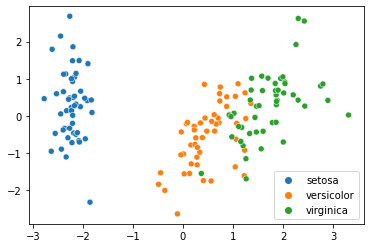

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=classes)